# Examples and Tutorial


Here is a brief work though a typical work flow determining isoleucine side-chain rotamer distributions from chemical shift. 

## Input file

The First step is to produce an input file that looks like this:

Here two residues are shown with columns for the residue id, atom type, chemical shift and secondary structure. The atom ids can be anything but must be different for each residue. The atom names need to be as shown. The secondary structure can be A (100% alpha helix), B (100% beta sheet) or a numerical value. If a numerical value is selected this represents the percentage of alpha helical content and the remainder is assumed to be beta sheet. In our work we assumed that the random coil was 50% helical and 50% beta sheet. So if one has propensities for all three states one can determine the helical percentage as shown in the example below. 

## Running the program

Here there are a few steps. Initially we need to import the module, specify the input file and the output file as follows: 

In [10]:
import pyroshift
%matplotlib inline

# This reads the file from example_run/PLC_cs.inp
chemical_shifts_file = 'PLC_cs.inp'
output_file = 'populations.txt'

Following this we need to decide which optimized tensors to use. In many ways this depends on how the secondary structure was obtained. If it was obtained from a well defined crystal structure we recommend using 'default' option, if the secondary structure structure propensity was determined from chemical shifts using, for example, TALOS then we recommend using the 'talos' option. 

In [11]:
# PDB backbone conformation
chemical_shifts = pyroshift.Isoleucine(chemical_shifts_file, ref_opt_file='default')

# A more extensive calculation can be done using. Here the tensors are optimised using 
# all the fitting and cross validation proteins pressented in out paper.
chemical_shifts = pyroshift.Isoleucine(chemical_shifts_file, ref_opt_file='pdb_best')

# backbone conformations from Talos 
chemical_shifts = pyroshift.Isoleucine(chemical_shifts_file, ref_opt_file='talos')

The rotamer populations can then be calculated by executing

In [12]:
#calculate the populations
chemical_shifts.calc_pops_for_all_residues()

calculating the populations ...


## Output


There are a variety of output options available. In the simplest we can print the results and write them to a file. Note that in the notation used here: 
- p: gauche plus   (60  degrees) 
- t: trans         (180 degrees)
- m: gauche minus  (300 degrees)

and the states are named as chi1 chi2. So the state where chi1 is in trans and chi2 is in gauche minus is named 'tm'.

In [13]:
# write lines to the screen
chemical_shifts.print_lines()
# write this to a file 
chemical_shifts.write_lines(output_file)

# residue  mm  mt  tt  pt
Ile81    0.942+/-0.020    0.000+/-0.000    0.000+/-0.000    0.058+/-0.020
Ile47    0.207+/-0.027    0.622+/-0.047    0.000+/-0.000    0.171+/-0.036


We can also make radar plots for each of the residues 

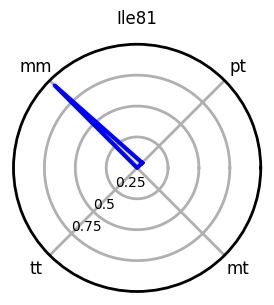

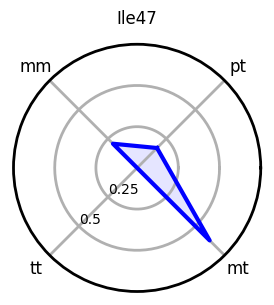

In [14]:
chemical_shifts.plot_radar()

During my PhD I toyed with the idea of writing out all the data into tables in LaTeX and so if there are any students out there looking to do the same I wrote this handy function for you


In [15]:
chemical_shifts.write_latex_pops('latex_populations.tex')

Anyway I hope this document was helpful. If you have any questions please get in touch. 
Lucas 